In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#importing stock data
df=pd.read_csv("C:\\Users\\techane\\OneDrive - Nokia\MTNN Documents\\training\\Data Science\\Machine learning\Project 4\\input_data\\data_stocks.csv")

In [137]:
# identifying numerical variables
numeric_col=[i for i in df.columns if df[i].dtype !='object']

In [138]:
#removing not useful variables
numeric_col.remove('SP500')

In [144]:
#data frame after removing categorical variables
df_sub=df.loc[:,numeric_col]
numeric_col

['NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EA',
 'NASDAQ.EBAY',
 'NASDAQ.EQIX',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NASDAQ.INCY',
 'NASDAQ.INFO',
 'NA

In [145]:
df_sub.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [147]:
# Eigen-decomposition: 5-step process
# 1. Normalize columns of $A$ so that each feature has zero mean
mu = np.mean(df_sub,axis=0)
print("what is mean across rows? ",mu)
#print(np.mean(A,axis=0))

what is mean across rows?  NASDAQ.AAL       47.708346
NASDAQ.AAPL     150.453566
NASDAQ.ADBE     141.317930
NASDAQ.ADI       79.446873
NASDAQ.ADP      103.480398
NASDAQ.ADSK     102.998608
NASDAQ.AKAM      50.894352
NASDAQ.ALXN     122.981163
NASDAQ.AMAT      43.291988
NASDAQ.AMD       12.624442
NASDAQ.AMGN     167.030297
NASDAQ.AMZN     968.747188
NASDAQ.ATVI      57.683091
NASDAQ.AVGO     238.598238
NASDAQ.BBBY      33.413552
NASDAQ.BIIB     272.957640
NASDAQ.CA        32.652696
NASDAQ.CBOE      89.325485
NASDAQ.CELG     126.928020
NASDAQ.CERN      64.227338
NASDAQ.CHRW      69.502897
NASDAQ.CHTR     348.719389
NASDAQ.CINF      73.025271
NASDAQ.CMCSA     39.607469
NASDAQ.CME      121.375413
NASDAQ.COST     165.457076
NASDAQ.CSCO      32.139336
NASDAQ.CSX       51.284218
NASDAQ.CTAS     127.416660
NASDAQ.CTSH      65.928564
                   ...    
NYSE.USB         51.863284
NYSE.UTX        119.265065
NYSE.V           95.693963
NYSE.VAR         98.311314
NYSE.VFC         57.134291
N

In [148]:
#what is the variance of each variable from mean 
A = df_sub - mu
print("Does A have zero mean across rows?" ,A)

Does A have zero mean across rows?        NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  \
0       -5.378346    -6.773566    -11.68793    2.593127   -1.250398   
1       -5.348346    -6.753566    -10.99793    2.633127   -1.340398   
2       -5.398346    -6.763466    -11.09293    2.583127   -1.267898   
3       -5.338346    -6.813566    -11.24503    2.553127   -1.340398   
4       -5.170546    -6.793566    -11.43793    2.588127   -1.420398   
5       -5.168446    -6.673566    -11.24793    2.593127   -1.440398   
6       -5.238346    -6.589566    -11.13793    2.673127   -1.150398   
7       -5.238346    -6.643566    -11.17793    2.743127   -1.110398   
8       -5.318346    -6.638566    -11.21793    2.783127   -1.100398   
9       -5.378346    -6.653566    -11.10793    2.718127   -1.150398   
10      -5.308346    -6.563566    -11.17793    2.763127   -1.280398   
11      -5.418346    -6.483566    -10.94793    2.703127   -1.200398   
12      -5.418346    -6.533666    -10.8580

In [149]:
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))

Does A have zero mean across rows?
NASDAQ.AAL     -4.473945e-13
NASDAQ.AAPL     1.129299e-13
NASDAQ.ADBE     8.095180e-13
NASDAQ.ADI      4.433276e-13
NASDAQ.ADP      2.407746e-14
NASDAQ.ADSK    -1.321120e-12
NASDAQ.AKAM     2.074824e-13
NASDAQ.ALXN     4.551943e-14
NASDAQ.AMAT    -1.462889e-13
NASDAQ.AMD      6.057607e-14
NASDAQ.AMGN    -1.611048e-13
NASDAQ.AMZN     9.634470e-12
NASDAQ.ATVI    -5.124359e-14
NASDAQ.AVGO     3.746106e-13
NASDAQ.BBBY    -1.052425e-11
NASDAQ.BIIB    -5.414148e-13
NASDAQ.CA      -1.734550e-14
NASDAQ.CBOE    -6.510487e-13
NASDAQ.CELG     5.757507e-13
NASDAQ.CERN     5.875589e-13
NASDAQ.CHRW    -7.791368e-13
NASDAQ.CHTR     2.257744e-13
NASDAQ.CINF     1.700523e-12
NASDAQ.CMCSA    6.903798e-15
NASDAQ.CME      9.930521e-13
NASDAQ.COST    -2.126399e-12
NASDAQ.CSCO     5.938103e-13
NASDAQ.CSX      6.105294e-13
NASDAQ.CTAS     1.619803e-12
NASDAQ.CTSH    -9.862563e-13
                    ...     
NYSE.USB       -7.592180e-14
NYSE.UTX        9.541460e-13
NYSE.V  

In [66]:
A.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-5.378346,-6.773566,-11.68793,2.593127,-1.250398,-17.778608,8.865648,-1.461163,-4.301988,1.985558,...,-13.572211,14.294334,-2.264402,-3.163984,1.245405,-11.940718,-4.321988,-7.897891,0.576485,-6.833874
1,-5.348346,-6.753566,-10.99793,2.633127,-1.340398,-17.348608,8.945648,-1.501163,-4.281988,2.085558,...,-13.572211,14.294334,-2.554402,-3.163984,1.245405,-11.920718,-4.321988,-8.017891,0.346485,-6.833874
2,-5.398346,-6.763466,-11.09293,2.583127,-1.267898,-17.488608,8.900648,-1.051163,-4.381988,2.015558,...,-13.357211,14.519334,-2.574402,-3.063984,1.235405,-11.940718,-4.421988,-8.007891,0.276485,-6.818874
3,-5.338346,-6.813566,-11.24503,2.553127,-1.340398,-17.511408,8.725648,-1.541163,-4.451988,2.005558,...,-13.482211,14.519334,-2.414402,-3.053984,1.235405,-11.950718,-4.381988,-7.877891,0.276485,-6.803874
4,-5.170546,-6.793566,-11.43793,2.588127,-1.420398,-17.298508,8.725648,-1.381163,-4.361988,2.045558,...,-13.472211,14.869334,-2.554402,-3.083984,1.245405,-11.940718,-4.341988,-7.847891,0.271485,-6.943874


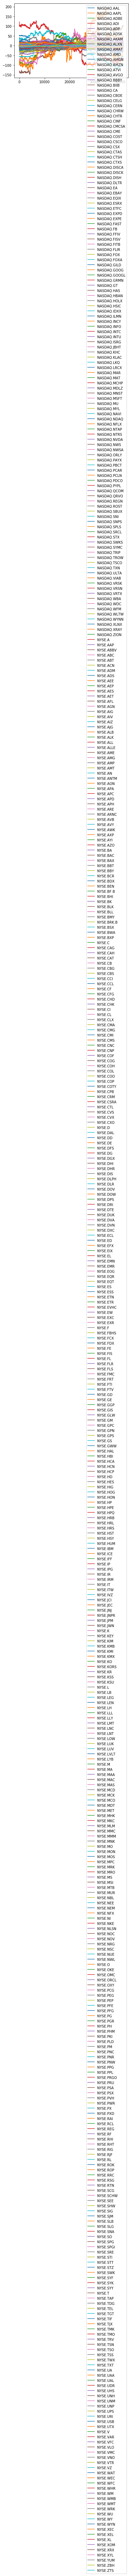

In [151]:
A.plot()

# Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance


Answer: NASDAQ.AAL and NASDAQ.ADI , also NASDAQ.AAPL and NASDAQ.ADSK

# Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.
Answer: 


# Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.
Answer:NASDAQ.AAL and NASDAQ.ADI , also NASDAQ.AAPL and NASDAQ.ADSK are moving together

In [75]:
# 2. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("---")
print("Sigma:")
print(Sigma)

---
Sigma:
              NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  \
NASDAQ.AAL     10.623541     1.668237    12.223796    1.365518    3.544513   
NASDAQ.AAPL     1.668237    38.897995    30.825805    3.296871    7.329894   
NASDAQ.ADBE    12.223796    30.825805    47.841289    3.587279   14.581418   
NASDAQ.ADI      1.365518     3.296871     3.587279    4.001131   -0.752885   
NASDAQ.ADP      3.544513     7.329894    14.581418   -0.752885   19.573937   
NASDAQ.ADSK    18.695942    37.786453    56.656479    8.841847   13.527547   
NASDAQ.AKAM    -6.950460   -21.481390   -25.397398   -3.128994   -4.900063   
NASDAQ.ALXN     0.351376    22.927637    38.035486   -9.222257   28.482213   
NASDAQ.AMAT     5.441848     8.331159    12.424559    2.468615    1.082594   
NASDAQ.AMD      1.041691    -1.741466     1.637101    0.098721    2.321917   
NASDAQ.AMGN    11.913307     5.658103    30.800853   -1.966533   15.927637   
NASDAQ.AMZN   102.027216    89.947505   196.945020   

In [77]:
# 3. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
l,X = np.linalg.eig(Sigma)
print("---")
print("Evalues:")
print(l)
print("---")
print("Evectors:")
print(X)
# 4. Compress by ordering $k$ evectors according to largest evalues and compute $A
print("---")
print("Compressed - 500D to 2D:")
Acomp = A @ X[:,:2] # first 2 evectors
print(Acomp.values[:5,:]) # first 5 observations

---
Evalues:
[2.95520927e+04 6.86174984e+03 3.73321310e+03 1.56128104e+03
 5.37835029e+02 3.64801935e+02 3.31658277e+02 2.05229911e+02
 1.47992450e+02 1.24419225e+02 8.29006236e+01 7.14236777e+01
 6.96196252e+01 6.01869843e+01 5.36812446e+01 4.43590051e+01
 4.18572639e+01 3.72323419e+01 2.95954964e+01 2.45588195e+01
 2.35392939e+01 2.18723377e+01 1.97575127e+01 1.68461892e+01
 1.45355994e+01 1.34202690e+01 1.27200685e+01 1.16669546e+01
 1.14661744e+01 1.03516612e+01 9.06572437e+00 8.75765113e+00
 7.64449885e+00 7.44393467e+00 7.17149750e+00 6.65700068e+00
 6.19188637e+00 6.12587851e+00 5.66625099e+00 5.55014260e+00
 4.86136641e+00 4.55252465e+00 4.11496915e+00 4.04786712e+00
 3.97359048e+00 3.45708164e+00 3.34515358e+00 3.30916698e+00
 3.04259779e+00 2.90753182e+00 2.75550304e+00 2.71656340e+00
 2.53395490e+00 2.37764626e+00 2.14910440e+00 2.04230190e+00
 1.98379323e+00 1.90314998e+00 1.76264768e+00 1.70746286e+00
 1.62652527e+00 1.57813908e+00 1.50228861e+00 1.44471886e+00
 1.40134997

In [67]:
#Normalizationm
#from sklearn.preprocessing iport SandardScaler
#norm_df=StandardScaler().fit_transform(df_sub)
from sklearn.preprocessing import StandardScaler
norm_df = StandardScaler().fit_transform(df_sub)

In [36]:
## Perform PCA and get top 12 PC's
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
pca_df=pca.fit_transform(norm_df)
pca.explained_variance_ratio_.cumsum()

array([0.47112747, 0.64316169, 0.76314865, 0.8116034 , 0.84962898,
       0.8776535 , 0.89762461, 0.91066073, 0.9211418 , 0.92864373,
       0.93546419, 0.94123476])

In [50]:
##Unsuperivsed ML Exmaple
from sklearn.cluster import *
##fit kmeans object to data
kmeans=KMeans(n_clusters=3,n_init=100).fit(pca_df)
#Print location of clusters learned by kmeans object
centroids=kmeans.cluster_centers_
centroids
##save new clusters for chart
y_km=kmeans.fit_predict(pca_df)
y_km=pd.Series(y_km)
pca_df1=pd.DataFrame(pca_df)

In [51]:
y_km.value_counts()

1    16901
0    14199
2    10166
dtype: int64

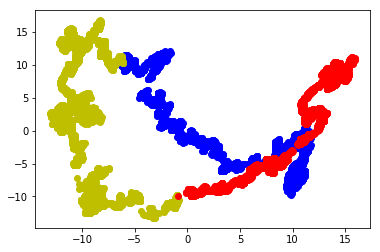

In [52]:
#plot the cluster
from scipy.cluster.vq import vq
centroids=kmeans.cluster_centers_
idx,_=vq(pca_df,centroids)

plt.plot(pca_df[idx==0,1],pca_df[idx==0,2],'ob',
        pca_df[idx==1,1],pca_df[idx==1,2],'oy',
        pca_df[idx==2,1],pca_df[idx==2,2],'or',
        pca_df[idx==3,1],pca_df[idx==3,2],'og',)

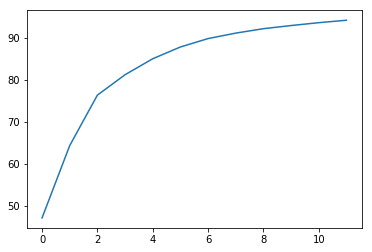

In [53]:
##The amount of variance that each PC explains Cumulative variance explains
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
plt.plot(var1)